***Authors:*** Mahdi Rafati, Mohammad Amin Alemohammad

----

## **Introduction**
An important first step in Data Science and Machine Learning is cleaning up your data. This includes identifying and removing data points that may be due to errors in data collection, or other factors that could lead us to make erroneous conclusions about the data. A group of these data points that we deal with are called `outliers`. There are some methods to find outliers such as `Tukey's method` and `Standard Scores`.<br>
In the first notebook of this article, we will learn Tukey's method to find outliers.<br>At the second part, we will introduce a visualization chart known as `Boxplot` (or `Box and Whiskers chart`) which use this method behind the scene to find outliers. So let's dive in.

> <span style="color: #d1001f;">***Note:***</span> Initially, we will explore the mathematical aspects to understand their workings, and subsequently, we will utilize some libraries for implementing them.


## **What are Outliers?**
Outliers are stragglers — extremely high or extremely low values — in a data set that can throw off your stats. For example, if you were measuring children's nose length, your average value might be thrown off if Pinocchio was in the class. They are data points that are “significantly different” from the majority of data points in a data set.<br>
> For instance, In this set of random numbers, 1 and 201 are outliers:<br>
`{1, 99, 100, 101, 103, 109, 110, 201}`<br>
`“1”` is an extremely low value and `“201”` is an extremely high value.

Of course, trying to find outliers isn’t always that simple. Your data set may look like this:<br>
`61, 10, 32, 19, 22, 29, 36, 14, 49, 3`.
You could guess that `3` might be an outlier and perhaps 61. But you’d be wrong: `61` is the only outlier in this data set.

In [ ]:
# Importing required libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

First, We will generate a random normal distributed set of numbers. We are going to find outliers on this dataset and eliminate them.
> <span style="color: #4a9d05;">***Appendix:***</span> We will use the same method on a real dataset from a CSV file to find them.

In [ ]:
np.random.seed(42) # Will Generate same array everytime
arr = np.random.normal(loc=60, scale=20, size=100) # Generate an array of 100 numbers with mean of 60 and standard deviation of 20
arr = np.round(arr,0) # Round numbers to avoid float numbers
arr

array([70., 57., 73., 90., 55., 55., 92., 75., 51., 71., 51., 51., 65.,
       22., 26., 49., 40., 66., 42., 32., 89., 55., 61., 32., 49., 62.,
       37., 68., 48., 54., 48., 97., 60., 39., 76., 36., 64., 21., 33.,
       64., 75., 63., 58., 54., 30., 46., 51., 81., 67., 25., 66., 52.,
       46., 72., 81., 79., 43., 54., 67., 80., 50., 56., 38., 36., 76.,
       87., 59., 80., 67., 47., 67., 91., 59., 91.,  8., 76., 62., 54.,
       62., 20., 56., 67., 90., 50., 44., 50., 78., 67., 49., 70., 62.,
       79., 46., 53., 52., 31., 66., 65., 60., 55.])

We can create a Pandas Series object with this array, but they operate much like a Numpy array.

In [ ]:
ages = pd.Series(arr, dtype='int64', name='Age') # Make a Pandas Serie
ages

0     70
1     57
2     73
3     90
4     55
      ..
95    31
96    66
97    65
98    60
99    55
Name: Age, Length: 100, dtype: int64

## **Tukey's Method**
Tukey's rule says that the outliers are values more than 1.5 times the *Interquartile Range (IQR)* from the *quartiles*, either below `Q1 − 1.5 * IQR`, or above `Q3 + 1.5 * IQR`.<br>
Here, `Q1`  is the first quartile, and `Q3` is the third quartile in our normal distributed set of numbers.<br>We will use these as part of writing a function to identify outliers according to Tukey's rule.

Now let's calculate the first and the third quartiles of our series. This will help us to see how much of our data is less than 25% (Q1) and how much is less than 75% (Q3).
By calculating and comparing Q1 and Q3, you can get an idea of the spread and central tendency of your data. We do this by using the Numpy `percentile()` function by giving it our series and the q-th percentile we want.
> <span style="color: #e69b00;">***Reminder:***</span> Second quartile (Q2) is the mean of the given set of numbers.

In [ ]:
Q1 = np.percentile(ages, 25)
Q3 = np.percentile(ages, 75)
print('1st Quartile:', Q1)
print('2nd Quartile:', Q3)

1st Quartile: 48.0
2nd Quartile: 68.5


### **What is IQR?**
**IQR** stands for *Interquartile Range*. The IQR contains the middle bulk of your data, so outliers can be easily found once you know the IQR.
It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).<br>The formula is:
> ### IQR = Q3 - Q1

In [ ]:
IQR = Q3 - Q1
IQR

20.5

### **Upper fence & Lower fence**
Upper and lower fences cordon off outliers from the bulk of data in a set. Fences are usually found with the following formulas:
> Upper fence = Q3 + (1.5 * IQR)<br>
  Lower fence = Q1 – (1.5 * IQR)

As you see we use IQR in formula as well so it is necessary to calculate IQR, 1st quartile, and the 3rd quartile:

In [ ]:
upper_fence = Q3 + (1.5 * IQR)
lower_fence= Q1 - (1.5 * IQR)
print('Lower fence:', lower_fence)
print('Upper fence:', upper_fence)

Lower fence: 17.25
Upper fence: 99.25


### **Finding outlier data points**
We performed these calculations to identify any potential outliers in our dataset. Now, with a concise command and condition, we can efficiently determine the outlier data points.

In [ ]:
outlier_data = [x for x in ages if x <= lower_fence or x>= upper_fence]
outlier_data

[8]

In [ ]:
# Showing the index and type of every outlier
for num in outlier_data:
  print(ages[ages == 8].index.values[0], type(num))

74 <class 'int'>


## **Plotting the data**
Now let's plot our data to see how data shows up with the outilers. For this matter, we use box plot. In a box plot, the IQR is the “box”, and 1.5 IQR are the extent of the “whiskers” in each direction from the median (The whiskers are Upper and Lower fences). In box plots, outliers are represented as individual points in the plot, beyond the whiskers.


<function matplotlib.pyplot.show(close=None, block=None)>

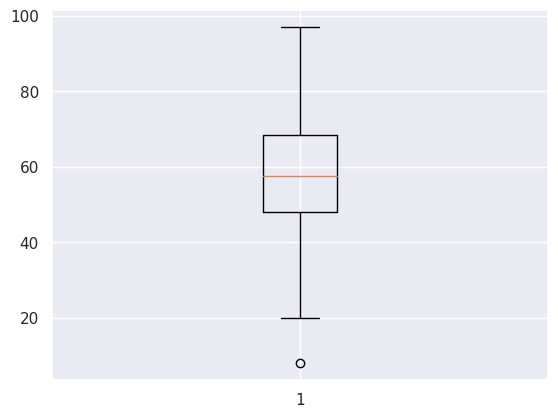

In [ ]:
plt.boxplot(ages)
plt.show

## **Conclusion**
We just saw a small part of the ML preprocessing ocean. Outliers are a problem because they have disproportionate leverage on statistical properties of the data, such as the mean and variance. Cleaning your data from outliers could enhance your model's learning process. So try to use this method to make your data **cleaner**.

## **Thanks!**
Thank you for coming so far in this notebook. We hope you've learned something today.<br>
In the second part of this article,, we will show more about box plot and see different usages of it on a real dataset.

 You can follow our LinkedIn for more learning. We will share our knowledge with you.
 [Mohammad Amin Alemohammad](https://linkedin.com/in/aminalemohammad), [Mahdi Rafati](https://linkedin.com/in/mahdi-rafati-97420a197)